In [1]:
# import the necessary packages
from imutils import paths 
import argparse
import imutils
import json 
import cv2
import os
import pandas as pd
import numpy as np

# tools for parallelism
from multiprocessing import Pool
from functools import partial

# separate function to compute mask for one landmark
from utils2.utils2 import one_key_mask

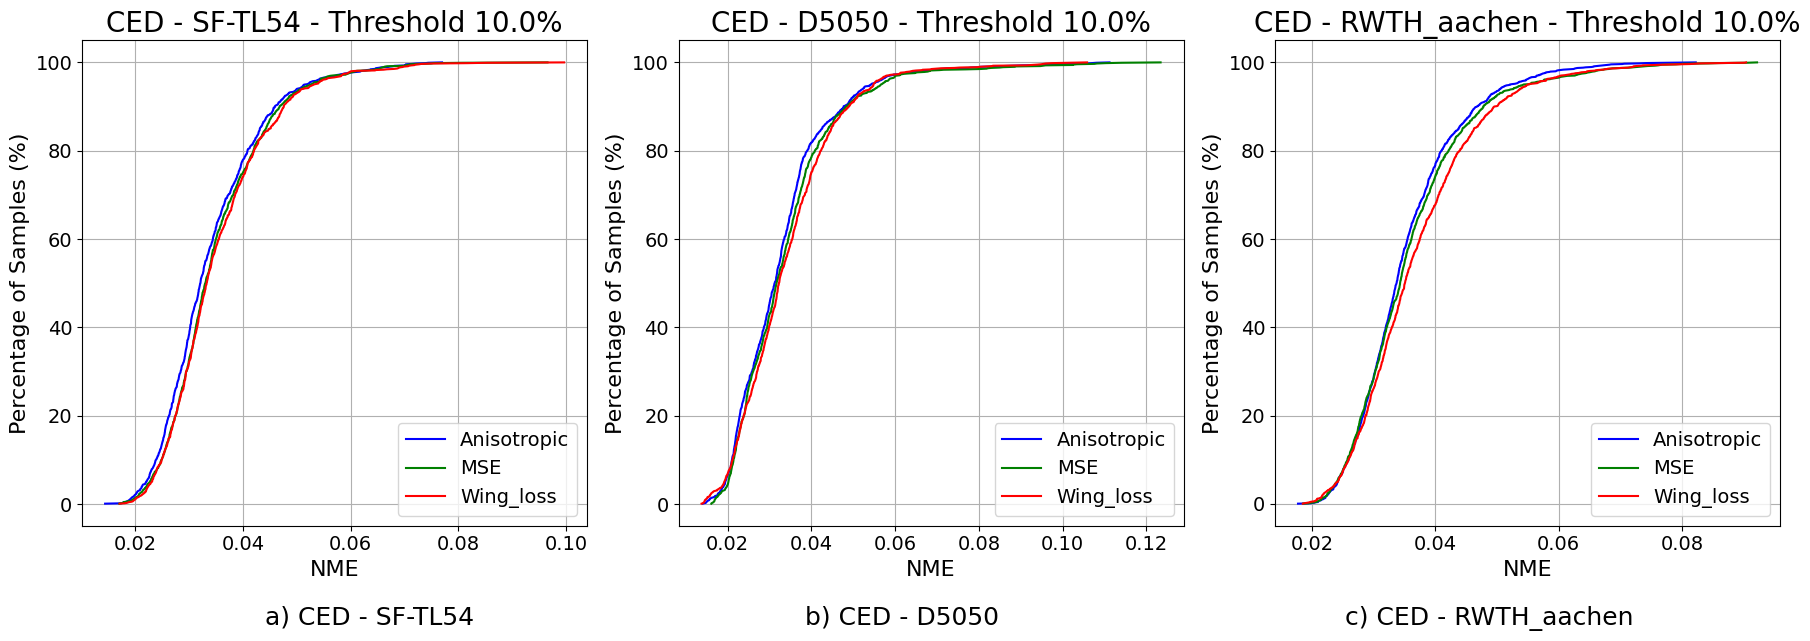

In [35]:
import os
import matplotlib.pyplot as plt

def plot_multiple_ceds_for_folders(root_folder, folder_names, file_names, threshold):
    colors = ['blue', 'green', 'red']  # You can customize the colors

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize as needed for horizontal layout

    for i, (folder_name, ax) in enumerate(zip(folder_names, axs)):
        for file_name, color in zip(file_names, colors):
            # Load data from text files
            results_file_path = os.path.join(root_folder, folder_name, f'{file_name}.txt')
            with open(results_file_path, 'r') as f:
                lines = f.readlines()
                nme_avg = float(lines[0].split(': ')[1])
                failure_rate_str = lines[1].split(': ')[1].rstrip('%\n')  # Remove both '%' and '\n'
                failure_rate = float(failure_rate_str)
                sorted_nme = list(map(float, lines[2].split(': ')[1].split(', ')))
                cumulative_errors = list(map(float, lines[3].split(': ')[1].split(', ')))

            # Plot CED
            ax.plot(sorted_nme, cumulative_errors, label=f'{file_name}', color=color)

        # Add labels and legend with increased font size
        ax.set_xlabel('NME', fontsize=16)
        ax.set_ylabel('Percentage of Samples (%)', fontsize=16)
        ax.set_title(f'CED - {folder_name} - Threshold {threshold * 100}%', fontsize=20)
        ax.grid(True)
        ax.legend(fontsize=14)

        # Set x-axis limits without filtering the data
        # ax.set_xlim([0.01, 0.1])

        # Increase tick font size
        ax.tick_params(axis='both', which='major', labelsize=14)

        # Add individual caption for each subplot under the figure
        caption = f'{chr(ord("a") + i)}) CED - {folder_name}'
        fig.text( 0.15+i * 0.3, -0.05, caption, ha='left', fontsize=18)  # Adjust position and fontsize

    plt.tight_layout()  # Adjust layout
    plt.savefig(os.path.join(root_folder, f'multiple_ced_plots_{threshold}.png'))
    plt.show()

# Example usage
root_folder = '\\CEDs'
folder_names = ['SF-TL54', 'D5050', 'RWTH_aachen']  # Replace with your actual folder names
file_names = ['Anisotropic', 'MSE', 'Wing_loss']  # Replace with your actual file names
threshold = 0.1  # Replace with your actual threshold

plot_multiple_ceds_for_folders(root_folder, folder_names, file_names, threshold)


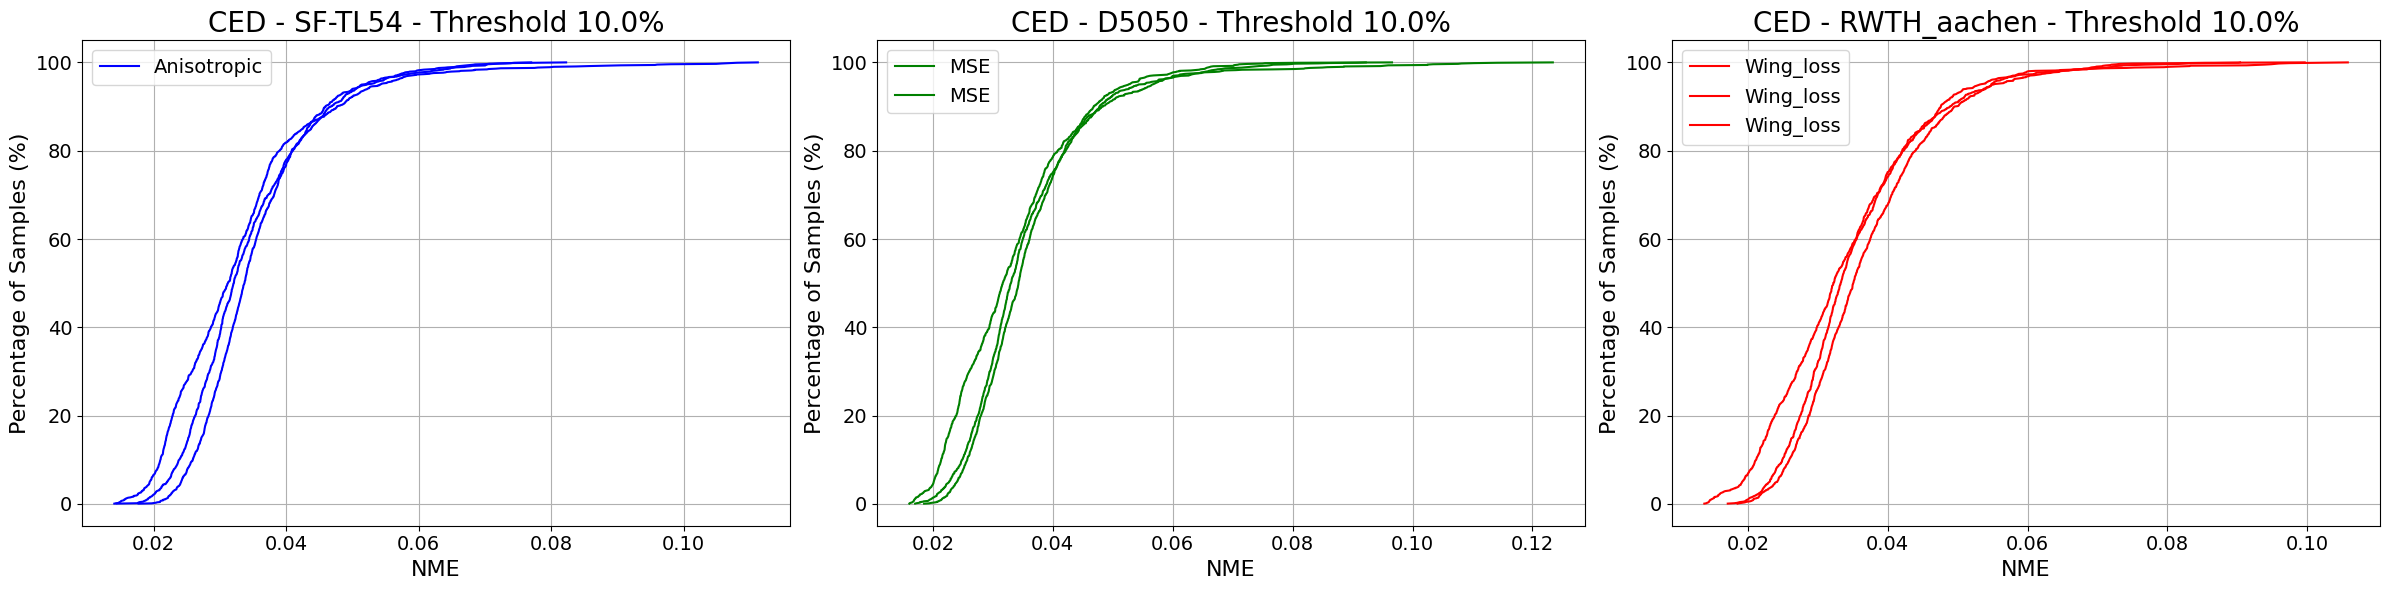